# 高速フーリエ変換(FFT)によるノイズ除去

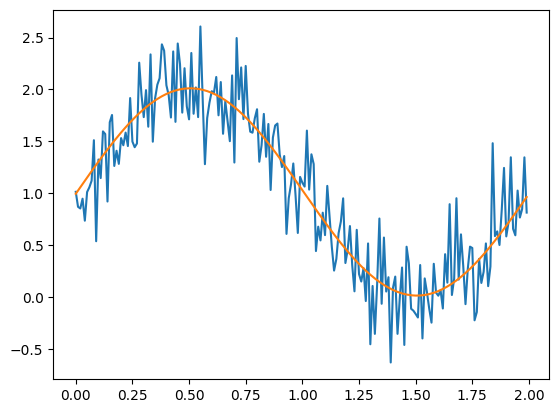

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# モデル設定
dt = 10e-3 # 制御周期(100Hz = 10ms)
t = np.arange(0, 2, dt) # 時間(グラフの横軸) 0~10まで
N = len(t)

# 入力 sin波+ノイズ
f0 = 1 + np.sin(np.pi * t)
dist = 0.3
f = f0 + np.random.normal(0, dist, len(t))

# FFT
y_fft = np.fft.fft(f)
freq = np.fft.fftfreq(N, d=dt)
Amp = abs(y_fft/(N/2))

# ノイズ除去
y_fft[abs(Amp) < 0.1] = 0
# LPF
y_fft[abs(freq) > np.pi] = 0

# 逆FFT
y_ifft = np.fft.ifft(y_fft)

# グラフ表示
# plt.plot(t, f0)
plt.plot(t, f)
plt.plot(t, y_ifft.real)
plt.show()